<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [1]:
import pandas as pd

yelp = pd.read_json('./data/review_sample.json', lines=True)

In [2]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


In [3]:
yelp.shape

(10000, 9)

## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [5]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_md")

In [6]:
def get_lemmas(text):
    lemmas = []
    doc = nlp(text)
    for token in doc:
        lemmas.append(token.lemma_)
    lemmas = ' '.join(lemmas)
    return lemmas


In [7]:
reviews = yelp['text']
clean = []
for review in reviews:
    clean.append(get_lemmas(review))

In [10]:
clean[5]

'tasty , fast casual latin street food .   the menu can be overwhelming at first but everything -PRON- have try be good .   -PRON- recommend try an Arepa .   also , the nacho be an extremely good bang for -PRON- buck - one be really enough for two people .   the space be pretty small , and this can be problematic for Friday lunch or Taco Tuesday .'

In [19]:
reviews = yelp['text']

In [8]:
import re
tokenizer = Tokenizer(nlp.vocab)

STOPWORDS = nlp.Defaults.stop_words.union(['yelp', 'i', 'we', ' ', 'PRON', ''])

def tokenize(doc):
    
    # Split, Shift to Lowercase
    tokens = tokenizer(doc)
    
    # Strip punctucation
    tokens = [re.sub(r'[^a-zA-Z ^0-9]', ' ', token.text) for token in tokens]
    
    # Strip whitespace
    tokens = [token.strip() for token in tokens]
        
    # Remove StopWords
    tokens = [token for token in tokens if token not in STOPWORDS]
    
    
    return tokens

In [11]:
token_reviews = []
for reviews in clean:
    token_reviews.append(tokenize(reviews))

In [12]:
token_reviews[5]

['tasty',
 'fast',
 'casual',
 'latin',
 'street',
 'food',
 'menu',
 'overwhelming',
 'try',
 'good',
 'recommend',
 'try',
 'Arepa',
 'nacho',
 'extremely',
 'good',
 'bang',
 'buck',
 'people',
 'space',
 'pretty',
 'small',
 'problematic',
 'Friday',
 'lunch',
 'Taco',
 'Tuesday']

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [13]:
# CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english',
                             max_features=5000,
                             tokenizer=tokenize)

In [22]:
reviews[5]

"Tasty, fast casual Latin street food.  The menu can be overwhelming at first but everything I've tried is good.  I recommend trying an Arepa.  Also, the nachos are an extremely good bang for your buck - one is really enough for two people.  The space is pretty small, and this can be problematic for Friday lunch or Taco Tuesday."

In [21]:
vectorizer.fit(reviews)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=5000, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function tokenize at 0x11a40bea0>, vocabulary=None)

In [23]:
dtm = vectorizer.transform(reviews)
dtm = pd.DataFrame(dtm.todense(), columns = vectorizer.get_feature_names())

In [24]:
dtm.shape

(10000, 5000)

In [25]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')

nn.fit(dtm)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [27]:
fake_review = """Visited as a guest in the Echo restaurant for lunch just today. We were entertaining
friends from California,and enjoyed our ocean side table. 
We chose to stay indoors - to enjoy the air conditioning 😊. I just want to say that, in addition to a nice meal,
we had a delightful waitress, Jackie. She had just the right balance of friendliness and efficiency. 
She recognized that we wanted time to visit and did not rush us. She and other staff members made certain that we
had everything we needed. Kudos!
"""

In [28]:
fake_review_transform = vectorizer.transform([fake_review])

In [30]:
similiar_reviews = nn.kneighbors(fake_review_transform.todense(), n_neighbors=10)

In [31]:
for num in similiar_reviews[1][0]:
    print(reviews[num])
    print('------------')

旅行でラスベガスに来ましたがネイルがはげてるのが気になり、探したお店でした。
質問にも丁寧に答えてくれましたし、日本人の方も日本語が話せる方も居て、とても綺麗で居心地のいいお店でした。 
ネイルはちはるさんと言う綺麗な方が丁寧にしてくれとても気に入りました。
予定になかったまつ毛エクステもお願いし、日本ではまだあまりないブラウンカラーのエクステをしてもらい、とても気に入りました。
また是非マッサージなどで伺いたいと思います。
------------
天氣很熱吃不下東西，今天我點了一個韓國冷面湯、餐後點了甜點，冰沙系列不會太甜膩，覺得店家很用心製作，包含擺盤精緻、佐料衛生，夏日想開胃，這是一個不錯的選擇，服務人員也很敬業，以後會常常來
------------
THis was really entertaining. There was a lot of acrobatics and martial arts it was really visual and awe inspiring beause of all that.
------------
Devin from Aptive Environmental went above and beyond! He got into every nook & cranny spraying for those pesky scorpions!!
------------
Best place everrrrr!!!
------------
They have delicious musubi and Hawaiian slush so bomb! First time here and we will be back again before we move back to the PNW.
------------
The tellers here are so nice they make you feel at home and the banking is easier than ever
------------
The most amazing chaat I have had in a long time. Go for aloo tikki and samosa chat!
-----------

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [32]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(yelp, test_size=0.2, random_state=42)

train.shape, test.shape

((8000, 9), (2000, 9))

In [33]:
X_train = train['text']
X_test = test['text']
y_train = train['stars']
y_test = test['stars']

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000,), (2000,), (8000,), (2000,))

In [34]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

vect = CountVectorizer(stop_words='english',
                    max_features=10000,
                    tokenizer=tokenize)
lr = LogisticRegression(solver='lbfgs', multi_class='auto')

pipe = Pipeline([ 
    ('vect', vect),
    ('lr', lr)
])

In [35]:
pipe.fit(X_train, y_train)

/Users/khaledadad/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=10000, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function tokenize at 0x11a40bea0>,
                                 vocabulary=None)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                           

In [36]:
train_pred = pipe.predict(X_train)
test_pred = pipe.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score

print(f'Train Accuracy: {accuracy_score(y_train, train_pred)}')
print(f'Test Accuracy: {accuracy_score(y_test, test_pred)}')

Train Accuracy: 0.9855
Test Accuracy: 0.586


In [38]:
y_train.value_counts(normalize=True)

5    0.449125
4    0.218250
1    0.148125
3    0.106000
2    0.078500
Name: stars, dtype: float64

In [39]:
pipe.predict([fake_review])[0] #predicted my review would've given 5 stars, pretty amazing

5

In [40]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'vect__max_features': (5000, 10000, None),
    'lr__max_iter': (100, 1000, 2000) 
}

In [41]:
grid_search = GridSearchCV(pipe, 
                           parameters, 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=10)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done  43 out of  45 | elapsed: 15.5min remaining:   43.4s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 16.1min finished
/Users/khaledadad/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=10000,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                           

In [42]:
grid_train_pred = grid_search.predict(X_train)

In [43]:
grid_test_pred = grid_search.predict(X_test)

In [44]:
print(f'Train Accuracy: {accuracy_score(y_train, grid_train_pred)}')
print(f'Test Accuracy: {accuracy_score(y_test, grid_test_pred)}')

Train Accuracy: 0.99075
Test Accuracy: 0.5885


## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [46]:
import gensim

from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora

In [59]:
id2word = corpora.Dictionary(token_reviews)
id2word.filter_extremes(no_below=10, no_above=0.75)

In [60]:
corpus = [id_.doc2bow(token) for token in token_reviews]

In [62]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   num_topics=15,
                   passes=10,
                   workers=4)

In [53]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]
topics = [' '.join(t) for t in words]

In [54]:
topics

['food service great restaurant time place experience come like good',
 'time order place come want service day know like look',
 'de good time la know et come try like place',
 'good food sushi place roll service great come eat location',
 'like good food come look time feel order class great',
 'good cream order try like ice delicious sauce cheese flavor',
 'wine good like great price try beer deal time house',
 'great come work time help need staff Dr office recommend',
 'food good great service place taco love restaurant try order',
 'food good place like chicken come order fry time try',
 'order food come time good place wait service table drink',
 'tell service time car ask come need customer like work',
 'room time hotel good stay staff recommend come service nail',
 'place great good love amazing food time nice pizza recommend',
 'hair nice great like place cut little good time look']

In [55]:
mport pyLDAvis.gensim
pyLDAvis.enable_notebook()

SyntaxError: invalid syntax (<ipython-input-55-fd5de517e959>, line 1)

In [56]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, reviews, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word, workers=4)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=reviews, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [63]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word,
                                                        corpus=corpus,
                                                        reviews=token_reviews,
                                                        start=3,
                                                        limit=18,
                                                        step=6)

In [64]:
import matplotlib.pyplot as plt

<Figure size 640x480 with 1 Axes>

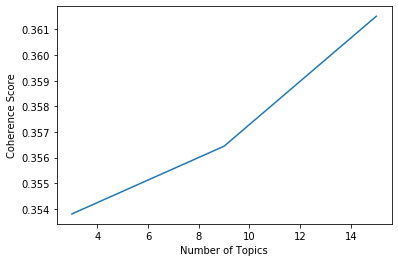

In [65]:
%matplotlib inline

x = range(3,18,6)
plt.plot(x, coherence_values)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)